In [1]:
import pandas as pd
import numpy as np

In [2]:
bitcoin_com = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/bitcoin.com_from_2024-02-06.csv') #file path
bitcoin_magazine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/bitcoin_magazine_from_2019-12-04.csv')
bitcoinist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/bitcoinist_from_2017-09-24.csv')
coindesk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/coindesk_from_2018-07-27.csv')
coingape = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/coingape_from_2018-12-30.csv')
cointelegraph = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/cointelegraph_from_2013-08-05.csv')
cryptodaily = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/cryptodaily_from_2017-08-11.csv')
decrypt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/decrypt_from_2023-11-29.csv')

In [3]:
pdList = [cointelegraph, bitcoin_com, bitcoin_magazine, bitcoinist, coindesk, coingape, cryptodaily, decrypt]  # List of your dataframes
df = pd.concat(pdList)

In [4]:
df.head()

,title,date,text,sentiment
0,Over 600 firms reveal billions in combined inv...,2024-05-16,Millennium Management is the largest Bitcoin E...,POSITIVE
1,Why is Solana (SOL) price up today?,2024-05-16,"Solana price is up today, helped by Robinhood'...",POSITIVE
2,Bitcoin analysis sees $74K next as BTC price t...,2024-05-16,BTC price action has its doubters after swiftl...,POSITIVE
3,"Bitcoin whale demand accelerates, but price ju...",2024-05-16,The break in Bitcoin’s daily downtrend and hei...,POSITIVE
4,Millennium Management discloses $2B in Bitcoin...,2024-05-16,International hedge fund Millennium Management...,POSITIVE


In [5]:
df.shape

(55080, 4)

In [6]:
df.dtypes

title        object
date         object
text         object
sentiment    object
dtype: object

In [7]:
df.describe(include='all')

,title,date,text,sentiment
count,55080,55080,54777,55080
unique,55078,2451,54610,3
top,QED Secures $3 Million in Funding to Propel Fu...,2024-04-24,"The best (and worst) quotes, adoption and regu...",POSITIVE
freq,2,101,26,28859


In [8]:
df.drop_duplicates(subset=['title'], inplace=True)
df.drop_duplicates(subset=['text'], inplace=True)
df.dropna(inplace=True)

In [9]:
df.describe(include='all')

,title,date,text,sentiment
count,54609,54609,54609,54609
unique,54609,2451,54609,3
top,Over 600 firms reveal billions in combined inv...,2024-04-24,Millennium Management is the largest Bitcoin E...,POSITIVE
freq,1,100,1,28746


In [10]:
print(df.isnull().sum())

title        0
date         0
text         0
sentiment    0
dtype: int64


In [11]:
del df['date']
del df['title']
df.head()

,text,sentiment
0,Millennium Management is the largest Bitcoin E...,POSITIVE
1,"Solana price is up today, helped by Robinhood'...",POSITIVE
2,BTC price action has its doubters after swiftl...,POSITIVE
3,The break in Bitcoin’s daily downtrend and hei...,POSITIVE
4,International hedge fund Millennium Management...,POSITIVE


In [12]:
df["sentiment"] = df["sentiment"].replace(["POSITIVE"], 1)
df["sentiment"] = df["sentiment"].replace(["NEUTRAL"], 0)
df["sentiment"] = df["sentiment"].replace(["NEGATIVE"], 2)

In [13]:
df.head()

,text,sentiment
0,Millennium Management is the largest Bitcoin E...,1
1,"Solana price is up today, helped by Robinhood'...",1
2,BTC price action has its doubters after swiftl...,1
3,The break in Bitcoin’s daily downtrend and hei...,1
4,International hedge fund Millennium Management...,1


In [14]:
df.dtypes

text         object
sentiment     int64
dtype: object

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [16]:
nltk.download('punkt', download_dir='.') #дополнительный словарь со знаками пунктуации
nltk.download('stopwords') #дополнительный словарь со стопсловами
nltk.download('wordnet') #словарь синонимов

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [18]:
def tokenized_text(raw_text):
  tokenized_str = nltk.word_tokenize(raw_text)
  filtered_tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
  filtered_tokens = [i for i in filtered_tokens if ( i not in stop_words )]
  tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  return tokens

In [19]:
from gensim.models import Word2Vec

In [20]:
tokenized_articles = df.text.apply(tokenized_text)

In [21]:
tokenized_articles = tokenized_articles.values

In [22]:
word2vec_model = Word2Vec(tokenized_articles, vector_size=100, window=50, min_count=1, workers=4, epochs=15, sg=0)

In [23]:
word_vectors= {}

for row in tokenized_articles:
    for token in row:
        if token not in word_vectors:
            word_vectors[token] = word2vec_model.wv.get_vector(token)

In [24]:
sequence_lengths = []

for i in range(len(tokenized_articles)):
  sequence_lengths.append(len(tokenized_articles[i]))

pd.Series(sequence_lengths).describe()

count    54609.000000
mean        16.927741
std          5.018175
min          1.000000
25%         13.000000
50%         17.000000
75%         21.000000
max         38.000000
dtype: float64

In [25]:
def message_to_word_vectors(sequences, word_vectors, desired_sequence_length=21):
  sequences_vectors = []

  for text in sequences:
    vectors = []
    for token in text:
      token_vector = word_vectors[token]
      vectors.append(np.mean(token_vector))
    x_seq_len = len(text)
    if x_seq_len > desired_sequence_length:
      sequences_vectors.append(vectors[:desired_sequence_length])
    else:
      sequence_length_difference = desired_sequence_length - x_seq_len
      pad = np.zeros(shape=(sequence_length_difference, ))
      sequences_vectors.append(np.concatenate([np.array(vectors), pad]))

  return np.array(sequences_vectors, dtype=float)

In [26]:
articles_vectors = message_to_word_vectors(tokenized_articles, word_vectors, 21)

In [27]:
articles_vectors.shape

(54609, 21)

In [28]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.5 MB/s eta 0:00:00


In [29]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

In [30]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, min_child_weight=1,
                              subsample=0.8, colsample_bytree=0.8, gamma=0, reg_lambda=1, reg_alpha=0)
lgb_model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=100, min_child_samples=20,
                               subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=0)
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, l2_leaf_reg=3, border_count=32, verbose=100)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                  max_features='sqrt', bootstrap=True)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2,
                                      min_samples_leaf=1, subsample=0.8, max_features=None)
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R')
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model), ('lgb', lgb_model), ('cat', cat_model), ('rf', rf_model), ('gb', gb_model), ('ada', ada_model)], voting='soft')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = articles_vectors
y = df['sentiment']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
X_train.shape, X_test.shape

((43687, 21), (10922, 21))

In [35]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5323
[LightGBM] [Info] Number of data points in the train set: 43687, number of used features: 21
[LightGBM] [Info] Start training from score -1.283349
[LightGBM] [Info] Start training from score -0.640557
[LightGBM] [Info] Start training from score -1.630184


LGBMClassifier(colsample_bytree=0.8, reg_alpha=0, reg_lambda=0, subsample=0.8)

In [38]:
cat_model.fit(X_train, y_train)

0:	learn: 1.0799209	total: 82.9ms	remaining: 8.21s
99:	learn: 0.9649897	total: 3.12s	remaining: 0us


In [39]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(subsample=0.8)

In [40]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [41]:
voting_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5323
[LightGBM] [Info] Number of data points in the train set: 43687, number of used features: 21
[LightGBM] [Info] Start training from score -1.283349
[LightGBM] [Info] Start training from score -0.640557
[LightGBM] [Info] Start training from score -1.630184
0:	learn: 1.0799209	total: 26.5ms	remaining: 2.63s
99:	learn: 0.9649897	total: 2.49s	remaining: 0us


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0...
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lgb',
                              LGBMClassifier(colsample_bytree=0.8, reg_alpha=0,
                                             reg_lambda=0, subsample=0.8)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7ad04c1c62f0>),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier(subsample=0.8)),
                             ('ada', AdaBoostClassifier())],
                 voting='soft')

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
models = {'CatBoost': cat_model,
          'Voting Classifier': voting_model,
          'AdaBoost': ada_model,
          'Gradient Boosting': gb_model,
          'Random Forest': rf_model,
          'LightGBM': lgb_model,
          'XGBoost': xgb_model}

In [44]:
def testing_models(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    if model_name == 'Voting Classifie':
      y_pred = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    return y_pred, accuracy

In [45]:
accuracy_lst = []
y_pred_lst = []
for model_name, model in models.items():
  y_pred, acc = testing_models(model_name, model, X_test, y_test)
  accuracy_lst.append(acc)
  y_pred_lst.append(y_pred)

CatBoost Accuracy: 0.5345174876396265
Voting Classifier Accuracy: 0.5356161875114448
AdaBoost Accuracy: 0.5327778795092474
Gradient Boosting Accuracy: 0.536348654092657
Random Forest Accuracy: 0.5281084050540195
LightGBM Accuracy: 0.5378135872550814
XGBoost Accuracy: 0.5376304706097784


In [46]:
import matplotlib.pyplot as plt

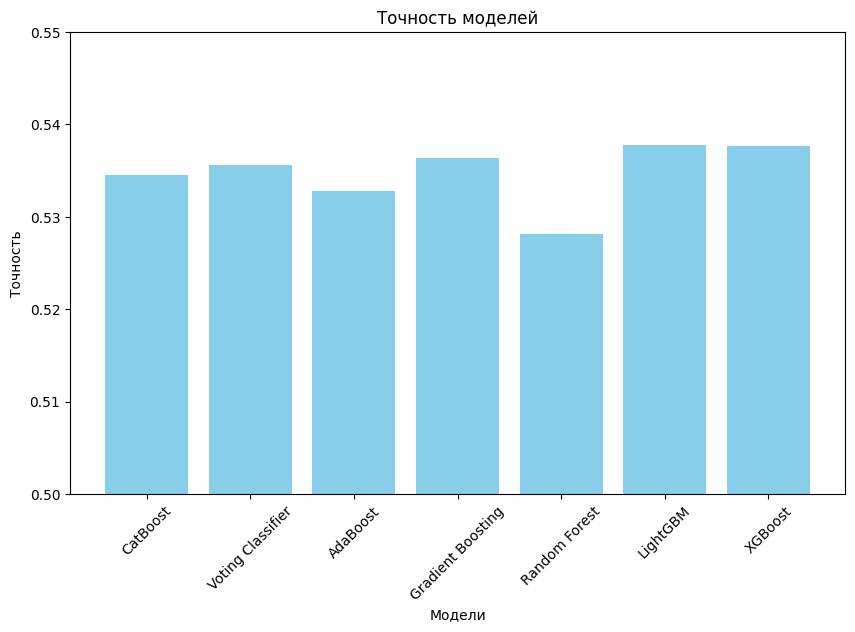

In [47]:
models = ['CatBoost', 'Voting Classifier', 'AdaBoost', 'Gradient Boosting', 'Random Forest', 'LightGBM', 'XGBoost']

# Визуализация столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_lst, color='skyblue')
plt.xlabel('Модели')
plt.ylabel('Точность')
plt.title('Точность моделей')
plt.ylim(0.5, 0.55)  # Задаем ограничение по оси Y для лучшей видимости различий
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [49]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

Results for CatBoost
[[ 113 2964   26]
 [  15 5683   25]
 [  15 2039   42]]


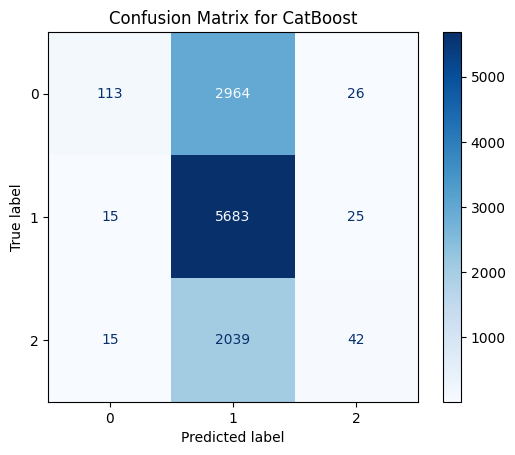

Results for Voting Classifier
[[ 151 2923   29]
 [  38 5652   33]
 [  23 2026   47]]


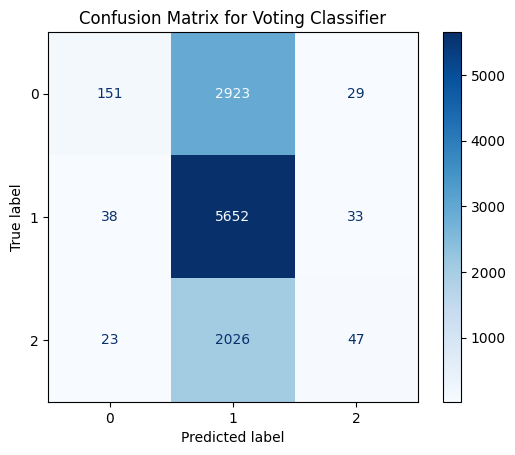

Results for AdaBoost
[[ 182 2872   49]
 [  84 5569   70]
 [  49 1979   68]]


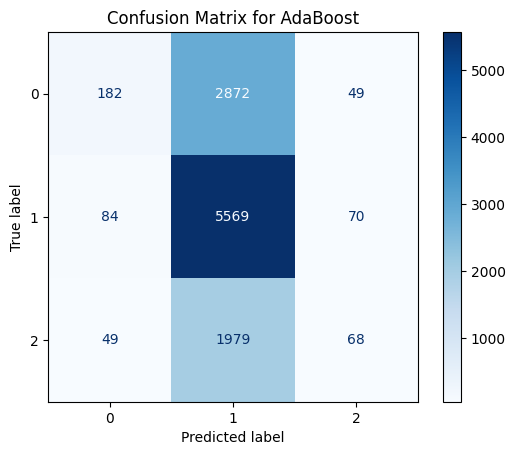

Results for Gradient Boosting
[[ 162 2911   30]
 [  41 5646   36]
 [  32 2014   50]]


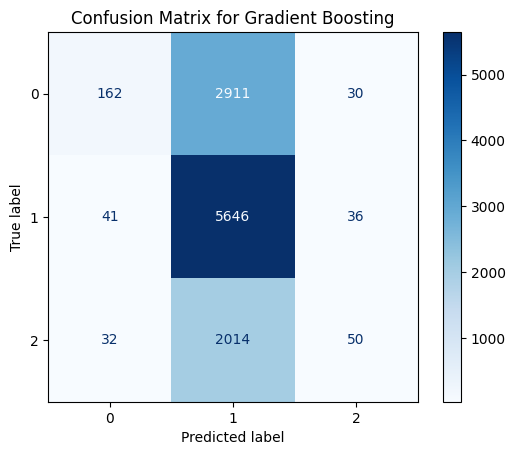

Results for Random Forest
[[ 265 2796   42]
 [ 215 5448   60]
 [ 111 1930   55]]


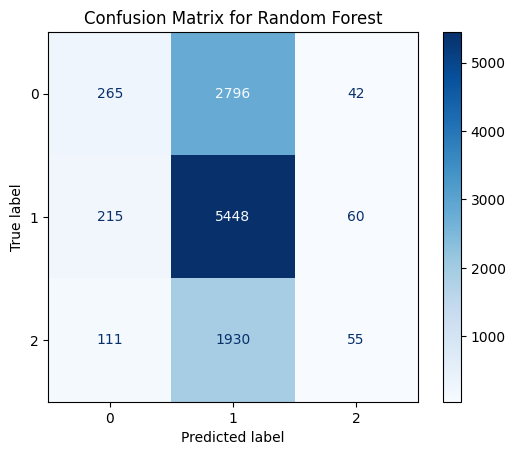

Results for LightGBM
[[ 210 2833   60]
 [  94 5570   59]
 [  47 1955   94]]


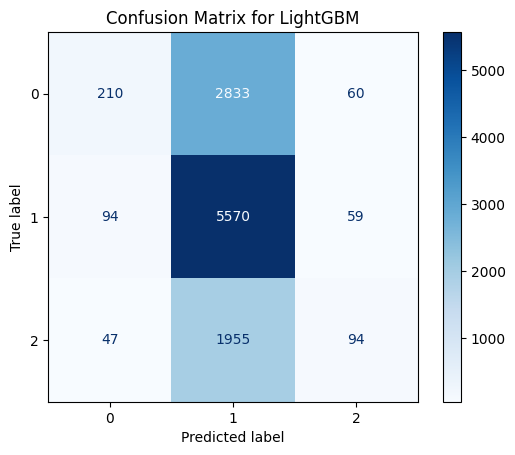

Results for XGBoost
[[ 194 2865   44]
 [  74 5590   59]
 [  38 1970   88]]


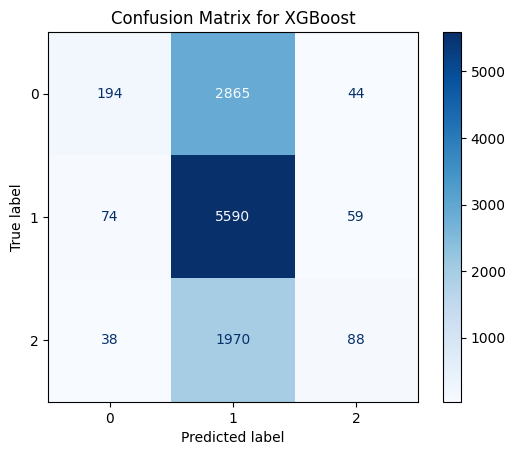

In [50]:
for i, name in enumerate(models):
    print(f"Results for {name}")
    plot_confusion_matrix(y_test, y_pred_lst[i], f"Confusion Matrix for {name}")

In [51]:
y_train.value_counts()

sentiment
1    23023
0    12106
2     8558
Name: count, dtype: int64

In [52]:
def plot_metrics(models, y_pred_lst, y_test):
    metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}
    for i, name in enumerate(models):
        report = classification_report(y_test, y_pred_lst[i], output_dict=True)
        metrics['Model'].append(name)
        metrics['Accuracy'].append(report['accuracy'])
        metrics['Precision'].append(report['weighted avg']['precision'])
        metrics['Recall'].append(report['weighted avg']['recall'])
        metrics['F1-score'].append(report['weighted avg']['f1-score'])

    x = np.arange(len(models))
    width = 0.2
    fig, ax = plt.subplots()
    ax.bar(x - 1.5*width, metrics['Accuracy'], width, label='Accuracy')
    ax.bar(x - 0.5*width, metrics['Precision'], width, label='Precision')
    ax.bar(x + 0.5*width, metrics['Recall'], width, label='Recall')
    ax.bar(x + 1.5*width, metrics['F1-score'], width, label='F1-score')

    ax.set_xlabel('Model')
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics['Model'])
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

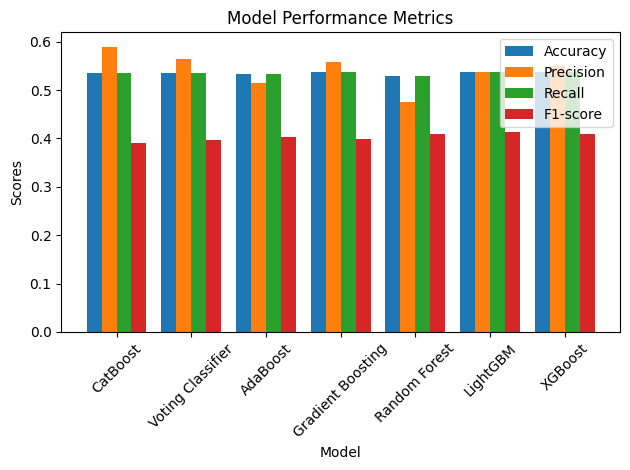

In [53]:
plot_metrics(models, y_pred_lst, y_test)

In [54]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [56]:
smoteenn = SMOTEENN(sampling_strategy='auto', random_state=1)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_train, y_train)

In [90]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [88]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[0, 1, 2], y=y_train_resampled)

In [89]:
class_weights

array([1., 1., 1.])

In [76]:
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [77]:
sample_weight = np.array([class_weight_dict[int(cls)] for cls in y_train])

In [91]:
xgb_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'verbosity': [1],
    'num_class': [3],
}


In [92]:
xgb_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [58]:
lgb_model = LGBMClassifier()
lgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'num_leaves': [31, 50],
    'verbose': [1],
    'num_class': [3],
    #'class_weight': [class_weight_dict]
}

In [93]:
lgb_model = LGBMClassifier()
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'num_leaves': [31, 50, 70, 100],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
xgboost_gs = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
lightgbm_gs = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, scoring='accuracy', cv=3, n_jobs=-1)

In [95]:
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, n_iter=50, scoring='accuracy', cv=3, random_state=42, n_jobs=-1, verbose=1)
lgb_random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=lgb_param_grid, n_iter=50, scoring='accuracy', cv=3, random_state=42, n_jobs=-1, verbose=1)

In [96]:
xgb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=1)

In [60]:
xgboost_gs.fit(X_train, y_train)#sample_weight=sample_weight

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.01, 0.05], 'max_depth': [6, 8],
                         'n_estimators': [100, 200], 'num_class': [3],
                         'subsample': [0.7, 0.8], 'verbosity': [1]},
             scoring='accuracy')

In [61]:
lightgbm_gs.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5323
[LightGBM] [Info] Number of data points in the train set: 43687, number of used features: 21
[LightGBM] [Info] Start training from score -1.283349
[LightGBM] [Info] Start training from score -0.640557
[LightGBM] [Info] Start training from score -1.630184
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [6, 8],
                         'n_estimators': [100, 200], 'num_class': [3],
                         'num_leaves': [31, 50], 'verbose': [1]},
             scoring='accuracy')

In [97]:
lgb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5354
[LightGBM] [Info] Number of data points in the train set: 69069, number of used features: 21
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 70, 100],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=1)

In [101]:
xgb_best_params = xgb_random_search.best_params_
lgb_best_params = lgb_random_search.best_params_

In [102]:
xgb_best_model = xgb_random_search.best_estimator_
lgb_best_model = lgb_random_search.best_estimator_

In [103]:
models = [xgb_best_model, lgb_best_model]
y_pred_lst = [model.predict(X_test) for model in models]

for model_name, y_pred in zip(['XGBoost', 'LightGBM'], y_pred_lst):
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.29      0.32      3103
           1       0.57      0.66      0.61      5723
           2       0.28      0.24      0.26      2096

    accuracy                           0.48     10922
   macro avg       0.40      0.40      0.40     10922
weighted avg       0.46      0.48      0.46     10922

Accuracy: 0.47582860281999634

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.31      0.33      3103
           1       0.57      0.63      0.60      5723
           2       0.27      0.25      0.26      2096

    accuracy                           0.47     10922
   macro avg       0.40      0.40      0.40     10922
weighted avg       0.45      0.47      0.46     10922

Accuracy: 0.46740523713605564

